- 학습목표 :
    1. groupby 함수 사용 실습
    2. 키워드 분석과정에서 진행한 코딩 복습

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt

In [2]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [3]:
df = pd.read_excel('./네이버보고서.xls',skiprows=[0])

In [14]:
# pandas 출력 옵션설정 - float형식으로 수치표기
pd.set_option('display.float_format', '{:.2f}'.format) # 항상 float 형식으로 뽑느다

In [15]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.00,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.00,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.00,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174
4,3. html,HTML,9626374,813.60,0.01,1408.44,1145903


### as-is : 키워드 기준 분석
    - 키워드의 노출수/클릭수/총비용...

### to-be : 광고그룹 기준 분석
    - 데이터의 구성을 광고그룹 기준으로 변경해야함
    - 광고그룹의 노출수/클릭수/총비용...
    - groupby 함수 사용

In [16]:
# groupby - 전달된 열을 기준으로 전체 데이터를 분류
grouped= df.groupby('광고그룹')

In [17]:
# 해당변수 출력시 객체정보만 출력됨
grouped
# 데이터를 살펴보기 위해서는 집계함수를 사용해야한다!!!

In [18]:
# count - 각 광고그룹 데이터의 개수
grouped.count()

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
#000_마케팅 전체_main,48,48,48,48,48,48
001.BASIC DESIGN,9,9,9,9,9,9
001.데이터분석/ 통계,10,10,10,10,10,10
002.R,9,9,9,9,9,9
002.UX/UI,5,5,5,5,5,5
...,...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,13,13,13,13,13,13
프로그래밍 유치원,8,8,8,8,8,8
프로그래밍 전체,12,12,12,12,12,12


In [19]:
# mean - 각 광고그룹 데이터의 평균
grouped.mean()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,14780.15,8.40,0.18,625.09,7243.96
001.BASIC DESIGN,5738.56,6.80,0.23,298.69,2427.33
001.데이터분석/ 통계,3715.00,20.28,0.89,1021.47,19575.60
002.R,13413.78,8.53,0.11,360.04,4796.00
002.UX/UI,3090.80,4.08,0.09,69.93,550.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,72092.69,16.71,0.05,648.33,15781.62
프로그래밍 유치원,5921.62,7.80,0.22,2032.33,23617.00
프로그래밍 전체,90375.00,9.20,0.02,123.88,1626.17


In [20]:
# median - 그룹 데이터의 중앙값
grouped.median()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,2765.00,3.60,0.06,765.97,2458.50
001.BASIC DESIGN,5524.00,2.40,0.04,357.50,1023.00
001.데이터분석/ 통계,1813.00,13.80,0.57,1096.80,13464.00
002.R,5184.00,3.60,0.03,119.17,1287.00
002.UX/UI,2649.00,1.20,0.09,73.33,88.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,5763.00,3.60,0.02,852.50,2706.00
프로그래밍 유치원,3748.00,3.00,0.12,1763.82,8002.50
프로그래밍 전체,3455.50,1.20,0.01,130.50,225.50


In [21]:
# 표준편차
grouped.std()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,43495.11,17.73,0.31,472.87,15854.71
001.BASIC DESIGN,4182.62,9.14,0.47,176.15,3220.04
001.데이터분석/ 통계,4109.84,18.32,0.82,269.59,19127.40
002.R,19333.63,14.71,0.17,371.70,10077.59
002.UX/UI,1996.65,7.18,0.11,69.11,1005.28
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,188247.58,35.27,0.06,470.85,37543.64
프로그래밍 유치원,6642.34,9.77,0.25,1649.70,37088.92
프로그래밍 전체,200385.15,17.26,0.03,119.98,2801.70


In [22]:
# var 분산
grouped.var()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,1891824593.19,314.41,0.10,223602.50,251371923.49
001.BASIC DESIGN,17494344.53,83.52,0.22,31027.33,10368671.50
001.데이터분석/ 통계,16890757.78,335.50,0.67,72677.81,365857245.60
002.R,373789206.44,216.52,0.03,138163.90,101557901.50
002.UX/UI,3986602.70,51.55,0.01,4775.52,1010592.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,35437152679.06,1243.79,0.00,221698.50,1409525055.09
프로그래밍 유치원,44120700.55,95.45,0.06,2721526.39,1375588223.43
프로그래밍 전체,40154209477.09,298.04,0.00,14394.51,7849530.33


## 광고그룹 기준 데이터 전처리

In [23]:
# 그룹데이터의 합계(sum) - 노출수, 클릭수, 총비용 칼럼
grouped.sum()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.20,8.83,30004.14,347710
001.BASIC DESIGN,51647,61.20,2.10,2688.24,21846
001.데이터분석/ 통계,37150,202.80,8.91,10214.73,195756
002.R,120724,76.80,1.00,3240.35,43164
002.UX/UI,15454,20.40,0.45,349.64,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,217.20,0.66,8428.26,205161
프로그래밍 유치원,47373,62.40,1.80,16258.61,188936
프로그래밍 전체,1084500,110.40,0.29,1486.58,19514


In [30]:
df_group=grouped.sum()
df_group

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.20,8.83,30004.14,347710
001.BASIC DESIGN,51647,61.20,2.10,2688.24,21846
001.데이터분석/ 통계,37150,202.80,8.91,10214.73,195756
002.R,120724,76.80,1.00,3240.35,43164
002.UX/UI,15454,20.40,0.45,349.64,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,217.20,0.66,8428.26,205161
프로그래밍 유치원,47373,62.40,1.80,16258.61,188936
프로그래밍 전체,1084500,110.40,0.29,1486.58,19514


In [31]:
# 클릭률, 평균클릭비용 칼럼 전처리
# 클릭률(ctr)= 클릭수 / 노출수
# 데이터전처리 --> 데이터프레임의 열 단위 수치연산
df_group['클릭률(%)']=df_group['클릭수']/df_group['노출수']

In [32]:
# 평균클릭비용(cpc) = 총비용 / 클릭수
df_group['평균클릭비용(VAT포함,원)']=df_group['총비용(VAT포함,원)']/df_group['클릭수']

In [35]:
# 클릭수 칼럼 중 0인 데이터가 존재 => 평균클릭비용 칼럼 중 결측값이 존재!!!
df_group[df_group['클릭수']==0]
# 결측값을 확인할 수 있다.

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.00,0.00,nan,0
fin_camp_business_4,2136,0.00,0.00,nan,0
fin_camp_rfs_9,1928,0.00,0.00,nan,0
다함께 DDD 프로젝트,3689,0.00,0.00,nan,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.00,0.00,nan,0


In [36]:
#fillna - 전달된 값으로 결측값을 대체하는 함수
# 평균클릭비용
df_group['평균클릭비용(VAT포함,원)']=df_group['평균클릭비용(VAT포함,원)'].fillna(0)

In [38]:
df_group[df_group['클릭수']==0]
# 결측값이 0으로 바뀐것을 볼 수 있다

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.00,0.00,0.00,0
fin_camp_business_4,2136,0.00,0.00,0.00,0
fin_camp_rfs_9,1928,0.00,0.00,0.00,0
다함께 DDD 프로젝트,3689,0.00,0.00,0.00,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.00,0.00,0.00,0


In [40]:
# 평균클릭비용 칼럼 반올림처리(round) , 소수점 제거 (astype(int))
df_group['평균클릭비용(VAT포함,원)']=round(df_group['평균클릭비용(VAT포함,원)'],0)
df_group['평균클릭비용(VAT포함,원)']=df_group['평균클릭비용(VAT포함,원)'].astype(int)

In [42]:
df_group[df_group['클릭수']==0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.00,0.00,0,0
fin_camp_business_4,2136,0.00,0.00,0,0
fin_camp_rfs_9,1928,0.00,0.00,0,0
다함께 DDD 프로젝트,3689,0.00,0.00,0,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.00,0.00,0,0


## 데이터 시각화

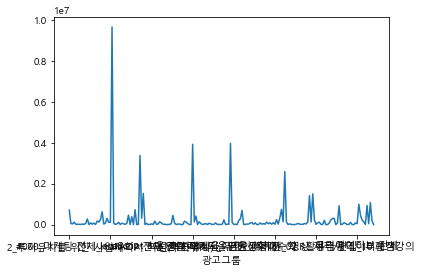

In [43]:
# 노출수 칼럼 선그래프
df_group['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터시각화 진행
    1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
    2. to-be : 정렬된 value를 기준으로 출력
        - 2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬
        - 2-2. 정렬된 데이터의 형태대로 index 재생성 후 시각화

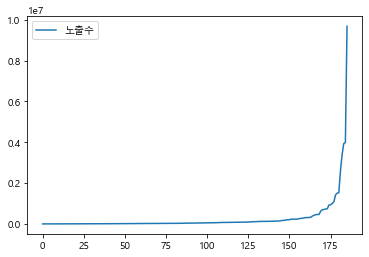

In [44]:
# 노출수 칼럼 선그래프
# sort_values(), reset_index(), drop('index',axis=1), plot -> 한줄로 코딩하기 해보쟈
(((df_group['노출수'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

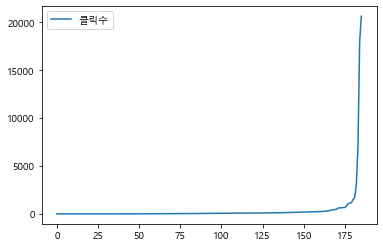

In [45]:
# 클릭수 칼럼 선그래프
# sort_values(), reset_index(), drop('index',axis=1), plot -> 한줄로 코딩하기 해보쟈
(((df_group['클릭수'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

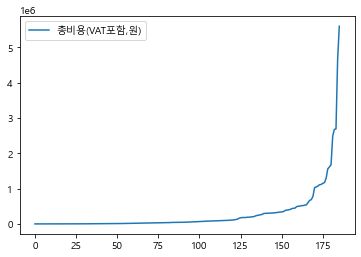

In [46]:
# 총비용 칼럼 선그래프
# sort_values(), reset_index(), drop('index',axis=1), plot -> 한줄로 코딩하기 해보쟈
(((df_group['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

## #중점관리 광고그룹 / 저효율 광고그룹
- 중점관리 광고그룹이란?
    - 1. 상위 20% (노출수 80 백분위수 이상)
    - 2. 상위 10% (클릭수 90백분위수 이상)

In [47]:
# df_group 에서 imp, clk 변수 생성해준다
imp=df_group['노출수']
clk=df_group['클릭수']

In [48]:
# 조건 걸기
result = df_group[(imp>=imp.quantile(0.8)) & (clk>=clk.quantile(0.9))]

In [49]:
# index - 중점관리 광고그룹 출력
result.index

Index(['#000_마케팅 전체_main', '1. 코딩', '3. html', '6. 파이썬', 'AOP 전체_중복키워드_디자인',
       'AOP 전체_중복키워드_비지니스', 'ㅍAOP 전체_중복키워드_디자인(삭제)', '마케팅 전체',
       '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵',
       '올인원 패키지 : 업무자동화_VBA', '타이포그래피와 편집디자인', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)'],
      dtype='object', name='광고그룹')

- 저효율 광고그룹이란?
    -  노출수, 클릭수 기준 상위의 키워드가 아닌데도 불구하고, 비용이 많이 쓰이고 있는 광고 그룹
        - 1. 노출수 80백분위수 미만
        - 2. 클릭수 90백분위수 미만
        - 3. 총비용 60백분위수 이상
        - 4. 총비용 90백분위수 미만

In [50]:
# df_group 에서 cost 변수 생성
cost = df_group['총비용(VAT포함,원)']

In [51]:
result= df_group[(imp<imp.quantile(0.8)) & (clk<clk.quantile(0.9)) & (cost>=cost.quantile(0.6)) & (cost<cost.quantile(0.9))]

In [52]:
# index - 저효율 광고그룹 출력
result.index

Index(['001.데이터분석/ 통계', '002.마케팅 입문', '003.퍼포먼스 마케팅', '1. 전체', '2. 프로그래밍',
       '5. 자료구조', 'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_데이터사이언스',
       'AOP 전체_중복키워드_프로그래밍', 'JavaScript BOOT CAMP',
       'Python & Django를 활용한 웹 서비스_개발자', 'SEO/SEM 전략',
       'TensorFlow로 시작하는 딥러닝 입문', 'fin_camp_auction_6', 'ㅍAOP 전체_중복키워드_공통(삭제)',
       'ㅍAOP 전체_중복키워드_마케팅(삭제)', 'ㅍAOP 전체_중복키워드_프로그래밍(삭제)',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', 'ㅍ올인원 패키지 : 브랜딩',
       '고객의 마음을 읽는 구글애널리틱스', '대기업을 이기는 브랜딩 전략', '마케터를 위한 데이터 부트캠프',
       '마케터를 위한 데이터 해석 실전', '마케팅 유치원', '마케팅KPI수립',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_02.쇼핑몰구축', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO',
       '올인원 패키지 : UX/UI 디자인 입문_연관검색어', '올인원 패키지 : 그로스해킹_5.마케팅 분석',
       '올인원 패키지 : 디지털 마케팅_1. 디지털 마케팅', '올인원 패키지 : 브랜딩',
       '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 업무자동화_4. VBA',
       '올인원 패키지 : 영상 제작/편집_9.유튜브/유튜버', '왕초보의 파이썬 웹 프로그래밍 CAMP',
       '코딩으로 여행하는 블록체인 서비스', '페이스북&인스타그램 마케팅 실전', '프로그래밍 유치원'],
      dtype='object', name='광고그룹')